In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
class CFG:
    SEED = 42

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab/DACON_DNA/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab/DACON_DNA/test.csv')
snp_info=pd.read_csv('/content/drive/MyDrive/Colab/DACON_DNA/snp_info.csv')

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class','father','mother','gender'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id','father','mother','gender'])
        return df_x

In [ ]:
X_train, target = get_x_y(train)
X_test = get_x_y(test)

In [ ]:
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]
for col in snp_col:
    print(col,':{}'.format(X_train[col].unique()))
    print('------------------------------')

SNP_01 :['G G' 'A G' 'A A']
------------------------------
SNP_02 :['A G' 'G G' 'A A']
------------------------------
SNP_03 :['A A' 'C A' 'C C']
------------------------------
SNP_04 :['G A' 'A A' 'G G']
------------------------------
SNP_05 :['C A' 'A A' 'C C']
------------------------------
SNP_06 :['A A' 'A G' 'G G']
------------------------------
SNP_07 :['A A' 'G G' 'G A']
------------------------------
SNP_08 :['G G' 'G A' 'A A']
------------------------------
SNP_09 :['A A' 'G A' 'G G']
------------------------------
SNP_10 :['G G' 'A G' 'A A']
------------------------------
SNP_11 :['A G' 'A A' 'G G']
------------------------------
SNP_12 :['A A' 'G A' 'G G']
------------------------------
SNP_13 :['A A' 'G G' 'A G']
------------------------------
SNP_14 :['A A' 'C C' 'C A']
------------------------------
SNP_15 :['A A' 'G G' 'G A']
------------------------------


In [ ]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [ ]:
# X_train.drop(['trait'],axis=1,inplace=True)
# X_test.drop(['trait'],axis=1,inplace=True)

In [ ]:
X_train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A
3,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G
4,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A


In [ ]:
# het_type=[]
# for i in range(len(X_test)):
#   value=0
#   if 'A G' in X_test.iloc[i,:].value_counts():
#     value+=X_test.iloc[i,:].value_counts()['A G']
#   if 'G A' in X_test.iloc[i,:].value_counts():
#     value+=X_test.iloc[i,:].value_counts()['G A']
#   if 'C A' in X_test.iloc[i,:].value_counts():
#     value+=X_test.iloc[i,:].value_counts()['C A']
#   het_type.append(value)

# het_type
# X_test['het_type']=het_type
# X_test.head()

In [ ]:
snp_data = []
for col in snp_col:
    snp_data += list(X_train[col].values)

In [ ]:
target = class_le.fit_transform(target)
snp_le.fit(snp_data)

LabelEncoder()

In [ ]:
for col in X_train.columns:
    if col in snp_col:
        
        X_train[col] = snp_le.transform(X_train[col])
        X_test[col] = snp_le.transform(X_test[col])

In [ ]:
X_train.head()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,2,5,1,0,4,2,0,0,5,0,5,1,0,0,0,0
1,2,1,1,2,0,0,1,0,4,0,1,0,4,5,0,0
2,2,5,5,0,4,3,5,0,4,4,1,0,0,0,0,0
3,1,0,5,0,4,0,5,5,0,5,1,5,5,5,0,5
4,2,5,5,3,0,3,0,0,0,0,5,0,0,1,0,4


In [ ]:
snp_le.inverse_transform([0,1,2,3,4,5])

array(['A A', 'A G', 'C A', 'C C', 'G A', 'G G'], dtype='<U3')

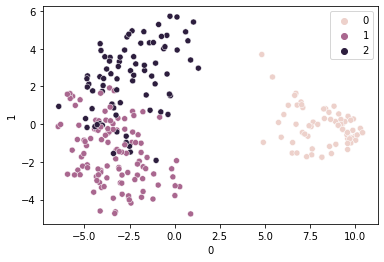

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_train))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=target)

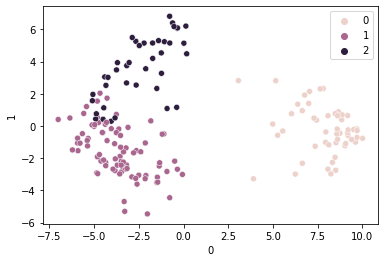

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, multi_class = 'multinomial')

lr.fit(X_train,target)

lr_pred = lr.predict(X_test)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=lr_pred)

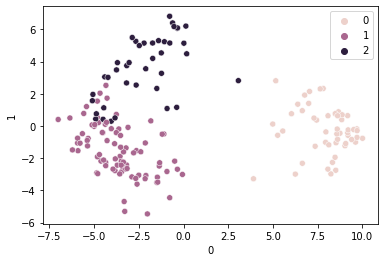

In [ ]:
from sklearn import svm

svm=svm.SVC(C=0.1,random_state=42,kernel='linear',probability=True)
svm.fit(X_train,target)

from sklearn.decomposition import PCA
svm_pred = svm.predict(X_test)
pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=svm_pred)

# RandomForest & Feature Importance

In [ ]:
forest = RandomForestClassifier(random_state=CFG.SEED)
forest.fit(X_train,target)

RandomForestClassifier(random_state=42)

In [ ]:
# n_feature = X_train.shape[1]

# index = np.arange(n_feature)

# forest = RandomForestClassifier(random_state=CFG.SEED,max_depth=4)
# forest.fit(X_train,target)



# plt.barh(index, forest.feature_importances_, align='center')

# plt.yticks(index, X_train.columns)

# plt.ylim(-1, n_feature)

# plt.xlabel('feature importance', size=15)

# plt.ylabel('feature', size=15)

# plt.show()

# forest_pred=forest.predict(X_train)
# print(f1_score(forest_pred,target,average='macro'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 6.0 MB/s 
     |████████████████████████████████| 132 kB 47.6 MB/s 
Features: Index(['SNP_05', 'SNP_07', 'SNP_10', 'SNP_11', 'SNP_15'], dtype='object')


In [ ]:
select_columns=X_train.columns.drop(['SNP_06','SNP_15'])
select_columns

Index(['SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_07', 'SNP_08',
       'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14'],
      dtype='object')

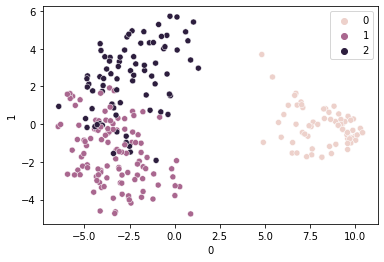

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_train))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=target)

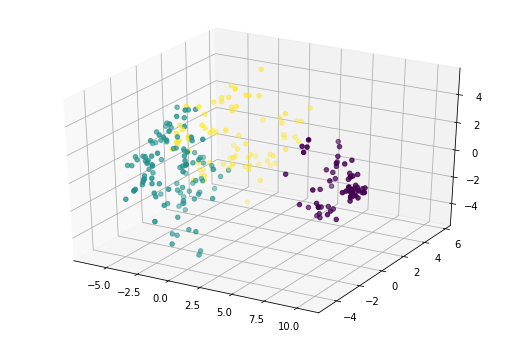

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

from sklearn import svm

svm=svm.SVC(C=0.6,random_state=42,kernel='linear',probability=False)
svm.fit(X_train,target)

from sklearn.decomposition import PCA
svm_pred = svm.predict(X_train)
pca=PCA(n_components=3)
pca_df=pd.DataFrame(pca.fit_transform(X_train))

import matplotlib.pyplot as plt
import seaborn as sns

ax.scatter(pca_df[0],pca_df[1],pca_df[2],c=svm_pred)

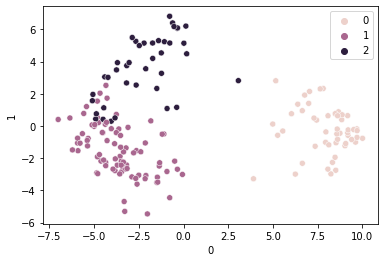

In [ ]:
from sklearn import svm

svm=svm.SVC(C=0.1,random_state=42,kernel='linear',probability=True)
svm.fit(X_train,target)

from sklearn.decomposition import PCA
svm_pred = svm.predict(X_test)
pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=svm_pred)

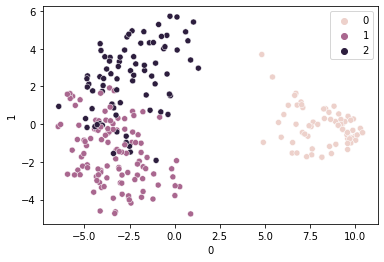

In [ ]:
from sklearn.decomposition import PCA

f_pred = forest.predict(X_train)
pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_train))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=f_pred)

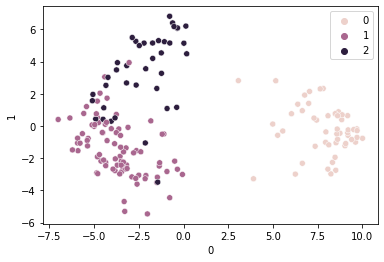

In [ ]:
from sklearn.decomposition import PCA

f_pred = forest.predict(X_test)

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=f_pred)

# kmeans and oversampling

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,random_state=42)

kmeans.fit(X_train)

kmeans_pred=kmeans.predict(X_test)

kmeans_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
normal_data=X_train[(target==1) | (target==2)]
target=target[(target==1) | (target==2)]
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 261
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SNP_01  193 non-null    int64
 1   SNP_02  193 non-null    int64
 2   SNP_03  193 non-null    int64
 3   SNP_04  193 non-null    int64
 4   SNP_05  193 non-null    int64
 5   SNP_06  193 non-null    int64
 6   SNP_07  193 non-null    int64
 7   SNP_08  193 non-null    int64
 8   SNP_09  193 non-null    int64
 9   SNP_10  193 non-null    int64
 10  SNP_11  193 non-null    int64
 11  SNP_12  193 non-null    int64
 12  SNP_13  193 non-null    int64
 13  SNP_14  193 non-null    int64
 14  SNP_15  193 non-null    int64
dtypes: int64(15)
memory usage: 24.1 KB


In [ ]:
tabnet_eval_data=normal_data.copy()
tabnet_eval_target=target.copy()

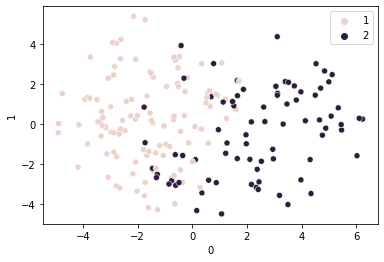

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(normal_data))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=target)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote=SMOTE(random_state=42)
# normal_data,target=smote.fit_resample(normal_data,target)

# from imblearn.over_sampling import BorderlineSMOTE

# b_smote=BorderlineSMOTE(random_state=42)
# normal_data,target=b_smote.fit_resample(normal_data,target)


from imblearn.over_sampling import ADASYN

adasyn=ADASYN(random_state=42)
normal_data,target=adasyn.fit_resample(normal_data,target)

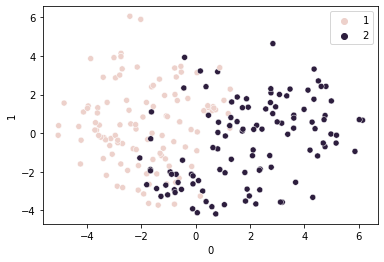

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(normal_data))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=target)

# Model

In [ ]:
from sklearn import svm

svm=svm.SVC(C=0.6,random_state=42,kernel='rbf',probability=True)
svm.fit(normal_data,target)

SVC(C=0.6, probability=True, random_state=42)

In [ ]:
from xgboost import XGBClassifier

xgb=XGBClassifier(booster='gblinear', #gblinear
                    n_estimators=500,
                    )



In [ ]:
import os
import sys
import platform
import random
import math
from typing import List ,Dict, Tuple

import pandas as pd
import numpy as np
 
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
!pip install catboost
from catboost import Pool,CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
normal_data.nunique()

SNP_01    6
SNP_02    5
SNP_03    4
SNP_04    4
SNP_05    4
SNP_06    4
SNP_07    3
SNP_08    5
SNP_09    3
SNP_10    6
SNP_11    4
SNP_12    5
SNP_13    5
SNP_14    4
SNP_15    6
dtype: int64

In [ ]:
cat_features = normal_data.columns[normal_data.nunique() <10].tolist()

In [ ]:
scores = []
xgb_models = []
is_holdout = False
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = []
for tri, vai in cv.split(normal_data,target):
    print("="*50)
    preds = []

    model = xgb=XGBClassifier(booster='gbtree', #gblinear
                    n_estimators=500,eval_metric='auc'
                    )
    model.fit(normal_data.iloc[tri], target[tri], 
            eval_set=[(normal_data.iloc[vai], target[vai])], 
            early_stopping_rounds=20 ,
            verbose = 10
        )
    
    xgb_models.append(model)
    #scores.append(model.score(normal_data,target))
    if is_holdout:
        break    

[0]	validation_0-auc:0.912055
Will train until validation_0-auc hasn't improved in 20 rounds.
[10]	validation_0-auc:0.972332
[20]	validation_0-auc:0.962451
Stopping. Best iteration:
[9]	validation_0-auc:0.976285

[0]	validation_0-auc:0.893281
Will train until validation_0-auc hasn't improved in 20 rounds.
[10]	validation_0-auc:0.944664
[20]	validation_0-auc:0.960474
[30]	validation_0-auc:0.971344
[40]	validation_0-auc:0.978261
[50]	validation_0-auc:0.980237
[60]	validation_0-auc:0.980237
Stopping. Best iteration:
[48]	validation_0-auc:0.982213

[0]	validation_0-auc:0.906126
Will train until validation_0-auc hasn't improved in 20 rounds.
[10]	validation_0-auc:0.961462
[20]	validation_0-auc:0.985178
[30]	validation_0-auc:0.999012
[40]	validation_0-auc:0.999012
Stopping. Best iteration:
[27]	validation_0-auc:0.999012

[0]	validation_0-auc:0.968379
Will train until validation_0-auc hasn't improved in 20 rounds.
[10]	validation_0-auc:0.994071
[20]	validation_0-auc:0.998024
[30]	validation_0

In [ ]:
scores = []
cat_models = []
is_holdout = False
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = []
for tri, vai in cv.split(normal_data,target):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=300,random_state=42,task_type="GPU",eval_metric="F1",cat_features=cat_features,one_hot_max_size=2)
    model.fit(normal_data.iloc[tri], target[tri], 
            eval_set=[(normal_data.iloc[vai], target[vai])], 
            early_stopping_rounds=20 ,
            verbose = 10
        )
    
    cat_models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break    

Learning rate set to 0.135612
0:	learn: 0.8915663	test: 0.8205128	best: 0.8205128 (0)	total: 71.6ms	remaining: 21.4s
10:	learn: 0.9662921	test: 0.8837209	best: 0.8837209 (2)	total: 908ms	remaining: 23.9s
20:	learn: 0.9832402	test: 0.9090909	best: 0.9090909 (15)	total: 1.35s	remaining: 18s
30:	learn: 0.9944134	test: 0.9090909	best: 0.9302326 (28)	total: 1.63s	remaining: 14.2s
40:	learn: 1.0000000	test: 0.9090909	best: 0.9302326 (28)	total: 1.91s	remaining: 12.1s
bestTest = 0.9302325581
bestIteration = 28
Shrink model to first 29 iterations.
Learning rate set to 0.135612
0:	learn: 0.8771930	test: 0.7804878	best: 0.7804878 (0)	total: 22.4ms	remaining: 6.69s
10:	learn: 0.9830508	test: 0.9545455	best: 0.9545455 (7)	total: 254ms	remaining: 6.66s
20:	learn: 0.9944134	test: 0.9545455	best: 0.9545455 (7)	total: 492ms	remaining: 6.54s
bestTest = 0.9545454545
bestIteration = 7
Shrink model to first 8 iterations.
Learning rate set to 0.135612
0:	learn: 0.8452381	test: 0.7804878	best: 0.7804878 (0)

In [ ]:
print(scores)

[0.9302325581395349, 0.9545454545454546, 0.9565217391304348, 0.9767441860465117, 0.9545454545454545]


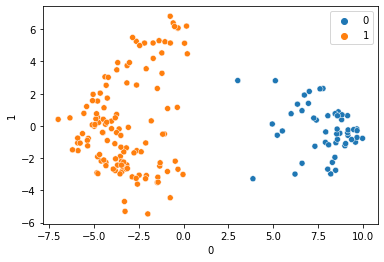

In [ ]:
kmeans_pred=kmeans.predict(X_test)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=kmeans_pred)

pred_0_index=pd.DataFrame(kmeans_pred)[kmeans_pred==0].index

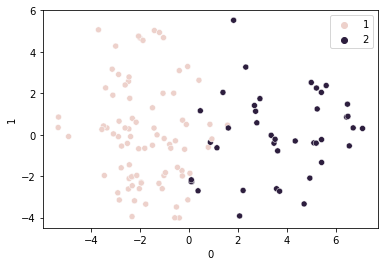

In [ ]:
#xgb
xgb.fit(normal_data,target )
xgb_pred=xgb.predict(X_test.drop(pred_0_index))

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=xgb_pred)

In [ ]:
# catboost
pred_list = []
scores = []
threshold = 0.45
for i,(tri, vai) in enumerate( cv.split(normal_data,target) ):
    pred = cat_models[i].predict_proba(normal_data.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 2, 1)
    score = f1_score(target[vai],pred,average='macro')
    scores.append(score)
    pred = cat_models[i].predict_proba(X_test.drop(pred_0_index))[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

cat_pred = np.mean( pred_list , axis = 0 )
#cat_pred = np.where(pred >= threshold , 2, 1)

[0.9110671936758893, 0.9333333333333332, 0.9332013854527461, 0.9555335968379447, 0.9333333333333332]
0.9332937685266494


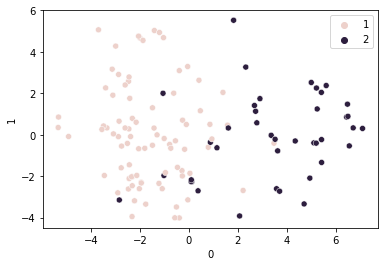

In [ ]:
#svm predict on train_data

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=cat_pred)

In [ ]:
# xgboost
pred_list = []
scores = []
threshold = 0.4
for i,(tri, vai) in enumerate( cv.split(normal_data,target) ):
    pred = xgb_models[i].predict_proba(normal_data.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 2, 1)
    score = f1_score(target[vai],pred,average='macro')
    scores.append(score)
    pred = xgb_models[i].predict_proba(X_test.drop(pred_0_index))[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

xgb_pred = np.mean( pred_list , axis = 0 )
#xgb_pred = np.where(pred >= threshold , 2, 1)

[0.9110671936758892, 0.9555335968379447, 0.8880039820806371, 0.9777337951509154, 0.9333333333333332]
0.9331343802157439


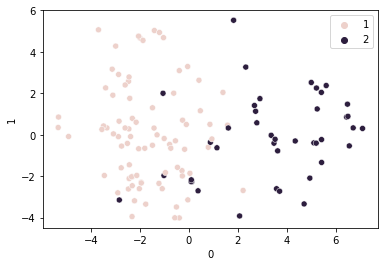

In [ ]:
#svm predict on train_data

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=xgb_pred)

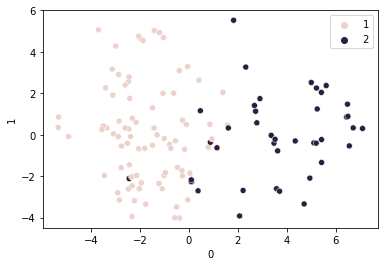

In [ ]:
#svm predict on train_data
svm_pred=svm.predict(X_test.drop(pred_0_index))

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=svm_pred)

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
!pip install pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 703 kB/s 


In [ ]:
nunique = X_train.nunique()
types = X_train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in X_train.columns:
    if types[col] == 'object' or nunique[col] < 10:
        print(col, X_train[col].nunique())
        categorical_columns.append(col)
        categorical_dims[col] = 3
    else:
        X_train.fillna(X_train.loc[X_train_indices, col].mean(), inplace=True)


# Categorical Embedding을 위해 Categorical 변수의 차원과 idxs를 담음.
unused_feat = ['Set']
features = [ col for col in X_train.columns if col not in unused_feat+[target]] 
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]


SNP_01 3
SNP_02 3
SNP_03 3
SNP_04 3
SNP_05 3
SNP_06 3
SNP_07 3
SNP_08 3
SNP_09 3
SNP_10 3
SNP_11 3
SNP_12 3
SNP_13 3
SNP_14 3
SNP_15 3


In [ ]:
normal_data = normal_data[features].values
target=target.reshape(-1,1)
target=np.ravel(target)
cat_emb_dim=[10]*15

In [ ]:
# # clf = TabNetMultiTaskClassifier(cat_idxs=cat_idxs,
# #                        cat_dims=cat_dims,
# #                        cat_emb_dim=2,
# #                        optimizer_fn=torch.optim.Adam,
# #                        optimizer_params=dict(lr=1e-2),
# #                        scheduler_params={"step_size":50,
# #                                          "gamma":0.9},
# #                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
# #                                 lambda_sparse=0, 
# #                        mask_type='entmax' # "sparsemax", entmax
# #                       )


tabnet = TabNetClassifier(seed=42,
                          optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                      )

max_epochs = 1000

tabnet.fit(
    X_train=normal_data, y_train=target,
    #eval_set=[(normal_data,target)],
    #[(tabnet_eval_data.values,np.ravel(tabnet_eval_target))],
    max_epochs=max_epochs , patience=5,
    batch_size=10, virtual_batch_size=5,
    num_workers=1,eval_metric=['auc'],
    drop_last=False,
)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from keras.wrappers.scikit_learn import KerasClassifier


scores = cross_val_score(tabnet, normal_data, target, scoring=make_scorer(f1_score, average='macro'), cv=5)
scores

epoch 0  | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s
epoch 0  | loss: 0.0     |  0:00:00s


array([0.41846154, 0.32603687, 0.41492369, 0.296875  , 0.35428006])

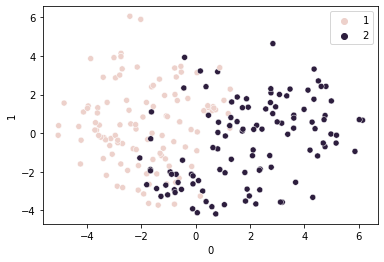

In [ ]:
# #svm predict on train_data

# tabnet_pred=tabnet.predict(normal_data)

# from sklearn.decomposition import PCA

# pca=PCA(n_components=2)
# pca_df=pd.DataFrame(pca.fit_transform(normal_data))

# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.scatterplot(pca_df[0],pca_df[1],hue=target)

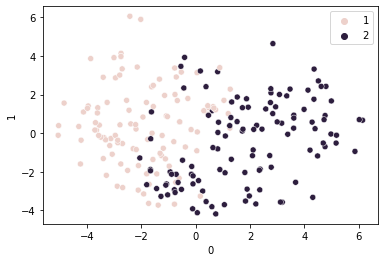

In [ ]:
#svm predict on train_data

tabnet_pred=tabnet.predict(normal_data)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(normal_data))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=tabnet_pred)

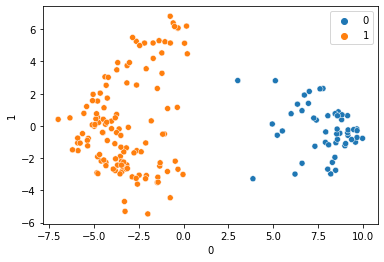

In [ ]:
kmeans_pred=kmeans.predict(X_test)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=kmeans_pred)

pred_0_index=pd.DataFrame(kmeans_pred)[kmeans_pred==0].index

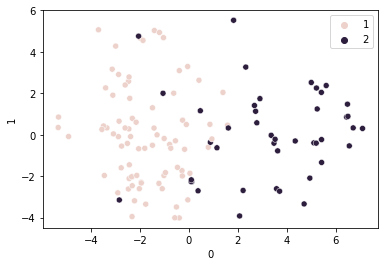

In [ ]:
#tabnet
tabnet_pred=tabnet.predict(X_test.drop(pred_0_index).values)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=tabnet_pred)

# Cross validation score

In [ ]:
from sklearn.model_selection import GridSearchCV

# xgb parameters
parameters={'booster':['gbtree','gblinear'], 'max_depth':[3,6,10],'gamma':[0,0.5,1]}

clf=GridSearchCV(xgb,param_grid=parameters,cv=5,refit=True,scoring=make_scorer(f1_score,average='macro'))

clf.fit(normal_data, target)

GridSearchCV(cv=5,
             estimator=XGBClassifier(booster='gblinear', n_estimators=500),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1], 'max_depth': [3, 6, 10]},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)

In [ ]:
xgb=clf.best_estimator_
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(gamma=0.5, n_estimators=500)>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer



scores = cross_val_score(xgb, normal_data, target, scoring=make_scorer(f1_score, average='macro'), cv=5)
scores

array([0.93320139, 0.93320139, 0.93333333, 0.9555336 , 0.97777778])

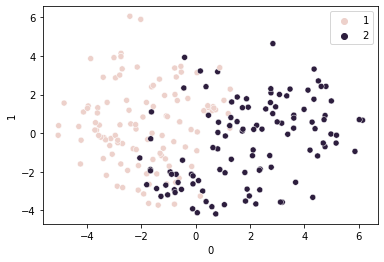

In [ ]:
#svm predict on train_data

xgb_pred=xgb.predict(normal_data)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(normal_data))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=target)

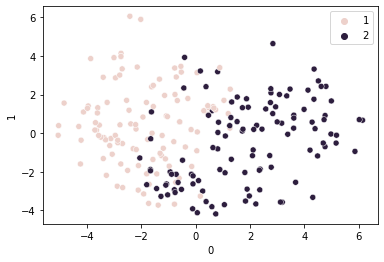

In [ ]:
#svm predict on train_data

xgb_pred=xgb.predict(normal_data)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(normal_data))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=xgb_pred)

# Inference

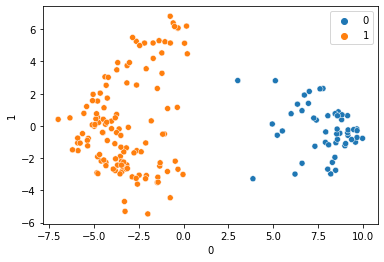

In [ ]:
kmeans_pred=kmeans.predict(X_test)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=kmeans_pred)

pred_0_index=pd.DataFrame(kmeans_pred)[kmeans_pred==0].index

array([0.13706368, 0.93490755, 0.49720852, 0.39227772, 0.93242188,
       0.19487841, 0.93806556, 0.09385635, 0.49046646, 0.25817655,
       0.11390835, 0.11250949, 0.08561844, 0.77991259, 0.08598181,
       0.15972287, 0.15246464, 0.1581107 , 0.23657372, 0.16061519,
       0.26839518, 0.09449781, 0.8489266 , 0.3581688 , 0.93054846,
       0.10081664, 0.15591606, 0.89929471, 0.09791428, 0.9200355 ,
       0.18639113, 0.1730492 , 0.27538813, 0.16174878, 0.91704228,
       0.205775  , 0.88436966, 0.0976944 , 0.08446762, 0.09146055,
       0.11798394, 0.85981653, 0.12370485, 0.90518135, 0.1027511 ,
       0.92313644, 0.93524162, 0.86032246, 0.25686333, 0.10075314,
       0.16319845, 0.07962496, 0.92784858, 0.15262403, 0.94297948,
       0.12304748, 0.1761575 , 0.10215484, 0.85075509, 0.10480611,
       0.20903946, 0.16977728, 0.17736284, 0.08800553, 0.08939839,
       0.91860695, 0.29662238, 0.1111052 , 0.83705062, 0.14387982,
       0.08203721, 0.92753018, 0.12632895, 0.93075427, 0.23778

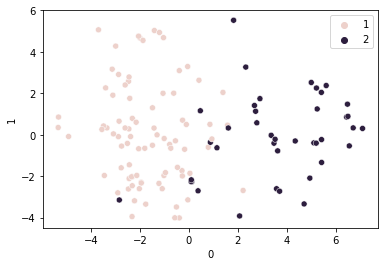

In [ ]:
xgb_pred
cat_pred
svm_pred=svm.predict_proba(X_test.drop(pred_0_index))[:,1]
tabnet_pred=tabnet.predict_proba(X_test.drop(pred_0_index).values)[:,1]


# threshold=0.45
# tabnet_pred = np.mean( pred_list , axis = 0 )
# tabnet_pred = np.where(tabnet_pred >= threshold , 2, 1)

# from sklearn.decomposition import PCA

# pca=PCA(n_components=2)
# pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.scatterplot(pca_df[0],pca_df[1],hue=tabnet_pred)





threshold=0.5
score_list=(xgb_pred+cat_pred+svm_pred+tabnet_pred)/4
final_pred = np.where(score_list >= threshold , 2, 1)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_df=pd.DataFrame(pca.fit_transform(X_test.drop(pred_0_index)))

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(pca_df[0],pca_df[1],hue=final_pred)
score_list

In [ ]:
# svm submit
svm_pred_df=X_test.drop(pred_0_index).copy()
svm_pred_df['pred']=svm_pred
pred_1_index=svm_pred_df[svm_pred_df['pred']==1].index
pred_2_index=svm_pred_df[svm_pred_df['pred']==2].index

In [ ]:
# xgb submit
xgb_pred_df=X_test.drop(pred_0_index).copy()
xgb_pred_df['pred']=xgb_pred
pred_1_index=xgb_pred_df[xgb_pred_df['pred']==1].index
pred_2_index=xgb_pred_df[xgb_pred_df['pred']==2].index

In [ ]:
# tabnet submit
tabnet_pred_df=X_test.drop(pred_0_index).copy()
tabnet_pred_df['pred']=tabnet_pred
pred_1_index=tabnet_pred_df[tabnet_pred_df['pred']==1].index
pred_2_index=tabnet_pred_df[tabnet_pred_df['pred']==2].index

In [ ]:
# ensemble submit
final_pred_df=X_test.drop(pred_0_index).copy()
final_pred_df['pred']=final_pred
pred_1_index=final_pred_df[final_pred_df['pred']==1].index
pred_2_index=final_pred_df[final_pred_df['pred']==2].index

In [ ]:
submit =pd.read_csv('/content/drive/MyDrive/Colab/DACON_DNA/sample_submission.csv')
submit['class']=0
submit.iloc[pred_0_index,1]='A'
submit.iloc[pred_1_index,1]='B'
submit.iloc[pred_2_index,1]='C'
submit

,id,class
0,TEST_000,A
1,TEST_001,B
2,TEST_002,C
3,TEST_003,B
4,TEST_004,A
...,...,...
170,TEST_170,B
171,TEST_171,C
172,TEST_172,C
173,TEST_173,B


In [ ]:
#submit['class'] = class_le.inverse_transform(xgb_pred)

In [ ]:
submit.to_csv('./ensemble3_submit.csv', index=False)